<a href="https://colab.research.google.com/github/votrannhatquang/AI-s-ng-th-7/blob/main/Fuzzy_logic_in_rainfall.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
pip install scikit-fuzzy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 994.0/994.0 KB 20.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for scikit-fuzzy: filename=scikit_fuzzy-0.4.2-py3-none-any.whl size=894088 sha256=1d1140c37654c532b6d77c72fdfdd336155447d701250085875e28b511ba18c6
  Stored in directory: /root/.cache/pip/wheels/32/2c/a1/a90a7d7dd8448ec029f298a61f3490275e99b17aa348be675c
Successfully built scikit-fuzzy


7.699419692683871


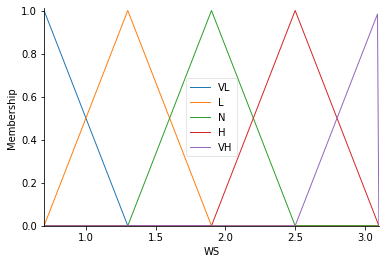

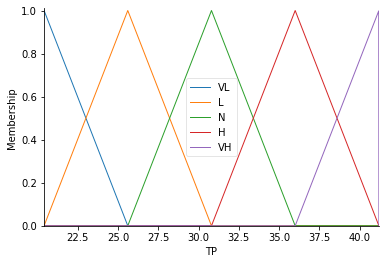

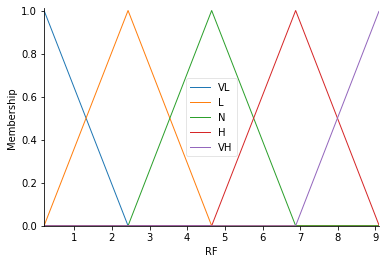

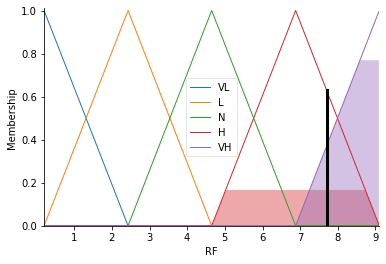

In [4]:
from numpy.core.multiarray import dtype
# Medical Diagnosis System Using Fuzzy Logic
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl

WS=ctrl.Antecedent(np.arange(0.7,3.1,0.01),'WS')
TP=ctrl.Antecedent(np.arange(20.4,41.2,0.01),'TP')
RF=ctrl.Consequent(np.arange(0.2,9.1,0.01),'RF')

WS['VL']=fuzz.trimf(WS.universe,[0.7,0.7,1.3])
WS['L']=fuzz.trimf(WS.universe,[0.7,1.3,1.9])
WS['N']=fuzz.trimf(WS.universe,[1.3,1.9,2.5])
WS['H']=fuzz.trimf(WS.universe,[1.9,2.5,3.1])
WS['VH']=fuzz.trimf(WS.universe,[2.5,3.1,3.1])

TP['VL']=fuzz.trimf(TP.universe,[20.4,20.4,25.6])
TP['L']=fuzz.trimf(TP.universe,[20.4,25.6,30.8])
TP['N']=fuzz.trimf(TP.universe,[25.6,30.8,36])
TP['H']=fuzz.trimf(TP.universe,[30.8,36,41.2])
TP['VH']=fuzz.trimf(TP.universe,[36,41.2,41.2])

RF['VL']=fuzz.trimf(RF.universe,[0.2,0.2,2.43])
RF['L']=fuzz.trimf(RF.universe,[0.2,2.43,4.65])
RF['N']=fuzz.trimf(RF.universe,[2.43,4.65,6.88])
RF['H']=fuzz.trimf(RF.universe,[4.65,6.88,9.1])
RF['VH']=fuzz.trimf(RF.universe,[6.88,9.1,9.1])

rule_1=ctrl.Rule(WS['VL'] & TP['VL'],RF['VL'])
rule_2=ctrl.Rule(WS['VL'] & TP['L'],RF['L'])
rule_3=ctrl.Rule(WS['VL'] & TP['N'],RF['L'])
rule_4=ctrl.Rule(WS['VL'] & TP['H'],RF['L'])
rule_5=ctrl.Rule(WS['VL'] & TP['VH'],RF['N'])
rule_6=ctrl.Rule(WS['L'] & TP['VL'],RF['VL'])
rule_7=ctrl.Rule(WS['L'] & TP['L'],RF['L'])
rule_8=ctrl.Rule(WS['L'] & TP['N'],RF['L'])
rule_9=ctrl.Rule(WS['L'] & TP['H'],RF['N'])
rule_10=ctrl.Rule(WS['L'] & TP['VH'],RF['H'])
rule_11=ctrl.Rule(WS['N'] & TP['VL'],RF['VL'])
rule_12=ctrl.Rule(WS['N'] & TP['L'],RF['L'])
rule_13=ctrl.Rule(WS['N'] & TP['N'],RF['N'])
rule_14=ctrl.Rule(WS['N'] & TP['H'],RF['N'])
rule_15=ctrl.Rule(WS['N'] & TP['VH'],RF['H'])
rule_16=ctrl.Rule(WS['H'] & TP['VL'],RF['L'])
rule_17=ctrl.Rule(WS['H'] & TP['L'],RF['N'])
rule_18=ctrl.Rule(WS['H'] & TP['N'],RF['N'])
rule_19=ctrl.Rule(WS['H'] & TP['H'],RF['H'])
rule_20=ctrl.Rule(WS['H'] & TP['VH'],RF['VH'])
rule_21=ctrl.Rule(WS['VH'] & TP['VL'],RF['N'])
rule_22=ctrl.Rule(WS['VH'] & TP['L'],RF['N'])
rule_23=ctrl.Rule(WS['VH'] & TP['N'],RF['H'])
rule_24=ctrl.Rule(WS['VH'] & TP['H'],RF['VH'])
rule_25=ctrl.Rule(WS['VH'] & TP['VH'],RF['VH'])

WS.view()
TP.view()
RF.view()

RF_ctrl=ctrl.ControlSystem([rule_1,rule_2,rule_3,rule_4,rule_5,rule_6,rule_7,rule_8,rule_9,rule_10,rule_11,rule_12,rule_13,rule_14,rule_15,rule_16,rule_17,rule_18,rule_19,rule_20,rule_21,rule_22,rule_23,rule_24,rule_25])
RFs=ctrl.ControlSystemSimulation(RF_ctrl)
RFs.input['WS']=3
RFs.input['TP']=40
RFs.compute()
print(RFs.output['RF'])
RF.view(sim=RFs)